Experiment 1: Education as a Countermeasure

group / group_intervention:

        C / 0: Control group (video on searching online)

        I / 1: Education group (video on deceptive patterns)

    pattern / pattern_bright:

        "deceptive" / 0: Cookie banner with unequal paths (deceptive pattern)

        "bright" / 1: Cookie banner with equal paths (non-deceptive pattern)

    group_x_pattern: Combined condition for interaction analysis.

🧠 Participant Behavior

    result: Response to cookie consent banner (accept, reject, settings-drop)

    accepted: Binary — 1 for accept, 0 for reject

👁️ Eye-Tracking Measures

    time_to_first_fixation: Time until participant first fixates on banner

    time_first_fixation_to_click: Time between first fixation and click

    duration_fixation_cookie: Total time fixated on banner

    duration_fixation_accept: Time fixated on accept button

    duration_fixation_reject: Time fixated on reject button

    num_fixations_cookie: Number of fixations on banner


🧍 Participant-level Data

    user_id: Participant identifier

    privacy_attitude: Privacy attitude score (same value per user across trials 1-7 scale)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_excel
import pandas as pd
import os

# Load the data from the "eye_data" sheet
root_path = "./"
file_name = "eye_data"
dataset_path = os.path.join(root_path, "{}.xlsx".format(file_name))
df = pd.read_excel(dataset_path)
# Display basic info and preview
df_info = df.info()
df_preview = df.head()

df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   obs_id                        731 non-null    int64  
 1   user_id                       731 non-null    int64  
 2   group                         731 non-null    object 
 3   group_intervention            731 non-null    int64  
 4   pattern                       731 non-null    object 
 5   pattern_bright                731 non-null    int64  
 6   website                       731 non-null    object 
 7   trial_order                   731 non-null    int64  
 8   result                        731 non-null    object 
 9   accepted                      731 non-null    int64  
 10  time_to_first_fixation        731 non-null    float64
 11  time_first_fixation_to_click  731 non-null    float64
 12  time_of_appearance            731 non-null    float64
 13  durat

In [ ]:
## Count number of trials per user
user_counts = df['user_id'].value_counts()

# Identify users with fewer than 8 samples
low_sample_users = user_counts[user_counts < 10]

# Filter out these users from the dataset
df_filtered = df[~df['user_id'].isin(low_sample_users.index)]

# Display the users who were removed and how many samples they had
removed_users = low_sample_users.reset_index()
removed_users.columns = ['user_id', 'num_samples']

removed_users

,user_id,num_samples
0,214,5


In [ ]:
!pip install bambi[arviz]

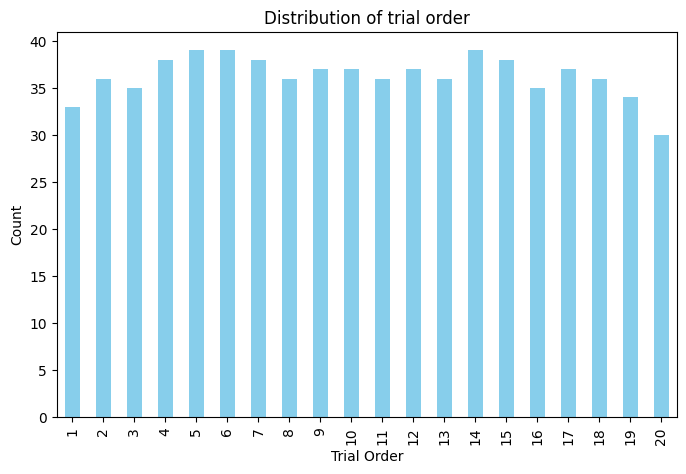

In [ ]:
# Trial order distribution
plt.figure(figsize=(8, 5))
df_filtered['trial_order'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of trial order")
plt.xlabel("Trial Order")
plt.ylabel("Count")
plt.show()

fixation duration on cookie consent

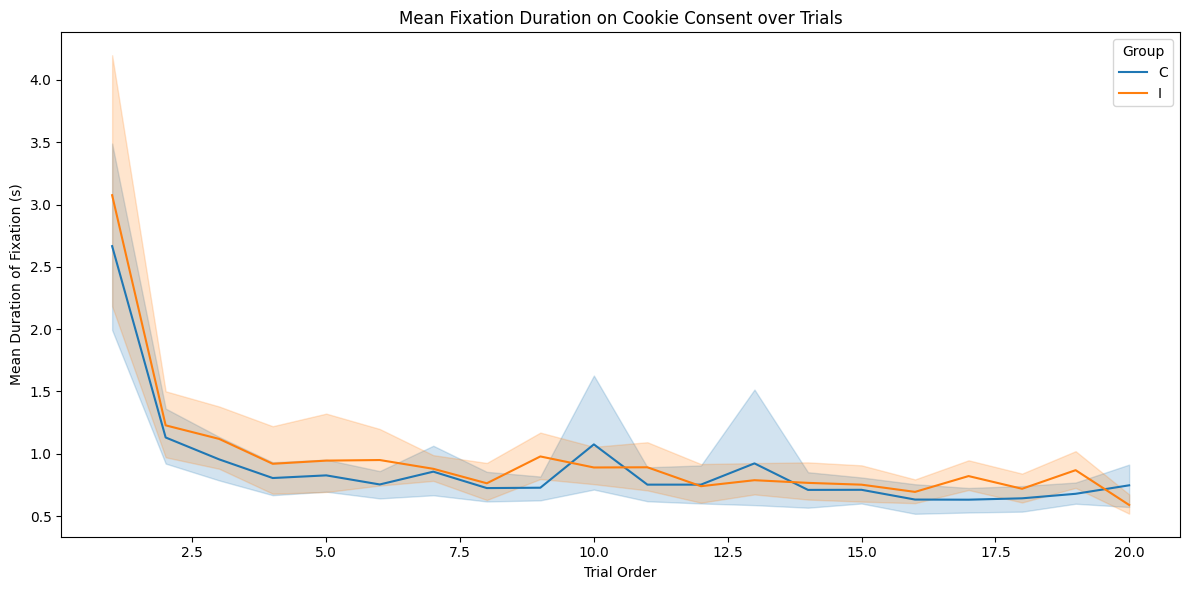

In [ ]:
# Plot: Lineplot of fixation time on cookie consent over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_cookie', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='duration_fixation_cookie'>

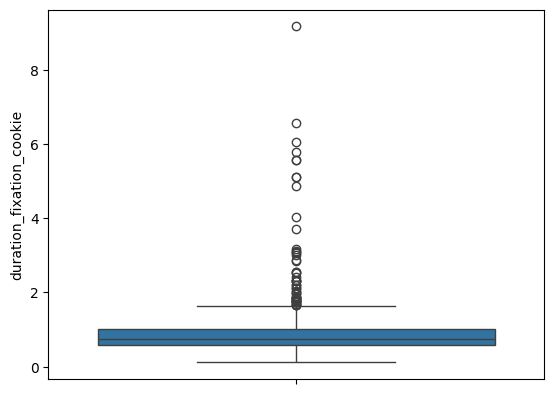

In [ ]:
sns.boxplot(df_filtered["duration_fixation_cookie"])

<Axes: xlabel='duration_fixation_cookie', ylabel='Count'>

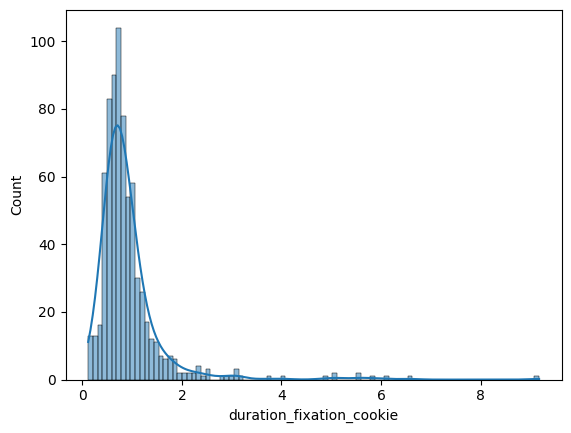

In [ ]:
sns.histplot(df_filtered["duration_fixation_cookie"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

# Convert variables to categorical as needed
df_filtered["group_intervention"] = df_filtered["group_intervention"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)
df_filtered = df_filtered.copy()

# gamma, poisson, weibull
# Fit model
model_FD_cookie = bmb.Model(
    "duration_fixation_cookie ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="weibull"
)

results_FD_cookie = model_FD_cookie.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)

In [ ]:
az.summary(results_FD_cookie)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[100],-0.020,0.203,-0.410,0.349,0.004,0.003,2085.0,3230.0,1.0
1|user_id[101],-0.166,0.139,-0.439,0.084,0.003,0.001,2722.0,4648.0,1.0
1|user_id[102],-0.152,0.146,-0.426,0.121,0.003,0.002,2711.0,4259.0,1.0
1|user_id[103],0.036,0.146,-0.231,0.314,0.003,0.002,2496.0,4457.0,1.0
1|user_id[104],-0.065,0.139,-0.342,0.184,0.003,0.002,3061.0,4801.0,1.0
1|user_id[105],0.310,0.135,0.063,0.567,0.002,0.001,3172.0,4819.0,1.0
1|user_id[106],0.161,0.138,-0.101,0.417,0.003,0.001,2900.0,4928.0,1.0
1|user_id[107],0.379,0.144,0.117,0.654,0.002,0.002,3676.0,5126.0,1.0
1|user_id[108],-0.209,0.154,-0.500,0.084,0.003,0.002,3110.0,3873.0,1.0
1|user_id[109],0.322,0.171,-0.002,0.636,0.003,0.002,2583.0,3928.0,1.0


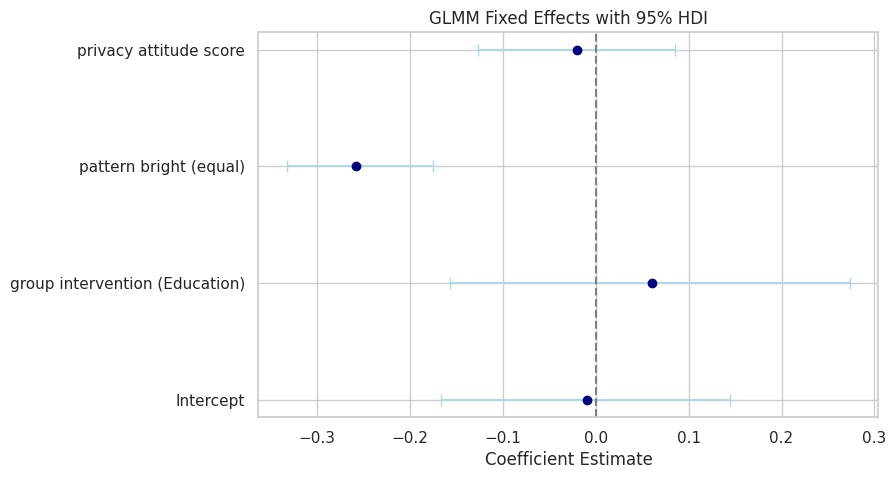

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [-0.009, 0.060, -0.258, -0.020],
    "Lower": [-0.167, -0.157, -0.333, -0.127],
    "Upper": [0.145, 0.274, -0.175, 0.085]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

number of fixation on cookie consent

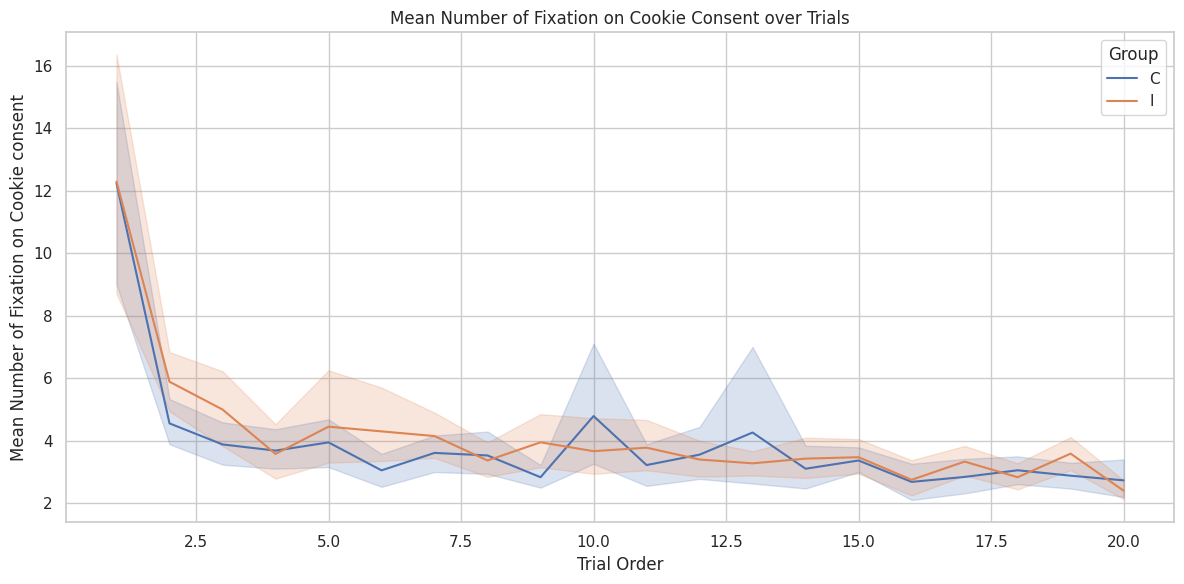

In [ ]:
# Plot: Lineplot of number of fixation on cookie consent over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='num_fixations_cookie', hue='group', estimator='mean')
plt.title("Mean Number of Fixation on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Number of Fixation on Cookie consent")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='num_fixations_cookie'>

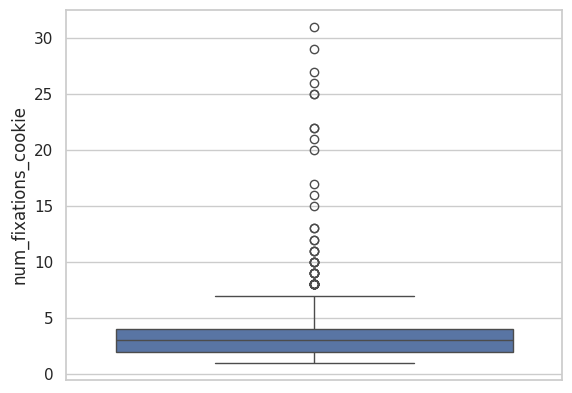

In [ ]:
sns.boxplot(df_filtered["num_fixations_cookie"])

<Axes: xlabel='num_fixations_cookie', ylabel='Count'>

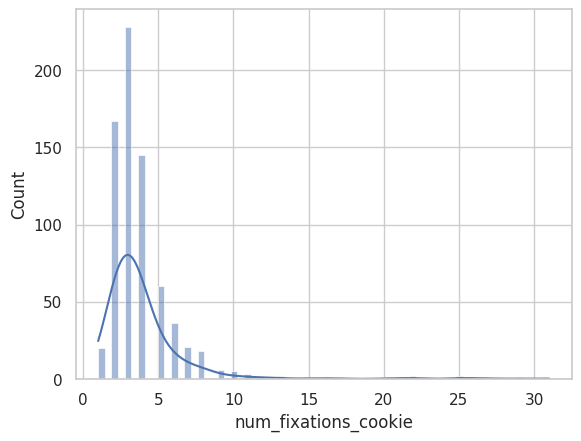

In [ ]:
sns.histplot(df_filtered["num_fixations_cookie"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

# Convert variables to categorical as needed
df_filtered["group_intervention"] = df_filtered["group_intervention"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")

df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

df_all = df_filtered.copy()
df_early = df_filtered[df_filtered["trial_order"].between(1, 10)].copy()
df_late = df_filtered[df_filtered["trial_order"].between(11, 20)].copy()

# Fit model
model_n_cookie = bmb.Model(
    "num_fixations_cookie ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="poisson"
)

results_n_cookie = model_n_cookie.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)

In [ ]:
az.summary(results_n_cookie)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[100],-0.060,0.154,-0.356,0.222,0.003,0.002,2931.0,4475.0,1.0
1|user_id[101],-0.144,0.119,-0.360,0.084,0.002,0.001,5092.0,5664.0,1.0
1|user_id[102],-0.025,0.124,-0.260,0.205,0.002,0.001,3992.0,4796.0,1.0
1|user_id[103],-0.046,0.125,-0.285,0.188,0.002,0.001,3716.0,5061.0,1.0
1|user_id[104],-0.092,0.119,-0.323,0.119,0.002,0.001,4114.0,5371.0,1.0
1|user_id[105],0.264,0.109,0.059,0.470,0.002,0.001,3420.0,5167.0,1.0
1|user_id[106],0.150,0.111,-0.057,0.361,0.002,0.001,4169.0,5305.0,1.0
1|user_id[107],0.374,0.114,0.168,0.593,0.002,0.001,3946.0,5379.0,1.0
1|user_id[108],-0.030,0.126,-0.271,0.200,0.002,0.001,4458.0,5224.0,1.0
1|user_id[109],-0.100,0.137,-0.362,0.155,0.002,0.001,3363.0,5480.0,1.0


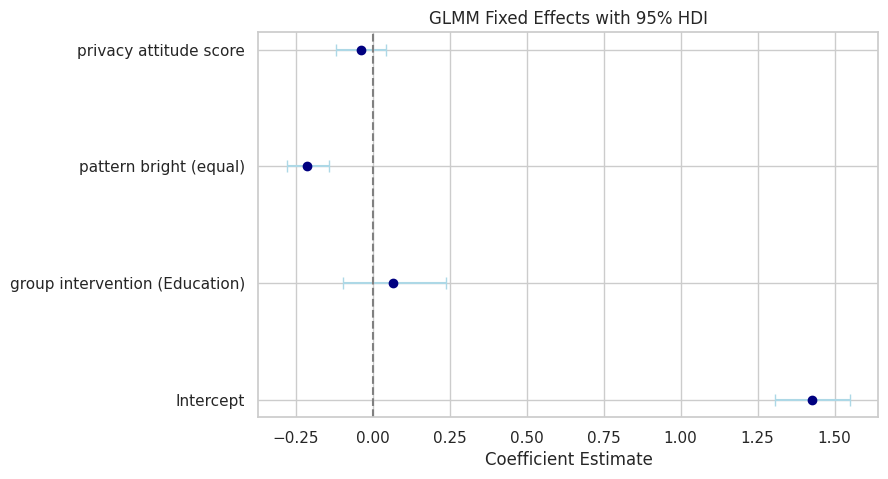

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [1.428, 0.067, -0.213, -0.038],
    "Lower": [1.308, -0.096, -0.280, -0.120],
    "Upper": [1.551, 0.238, -0.143, 0.043]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

decision time

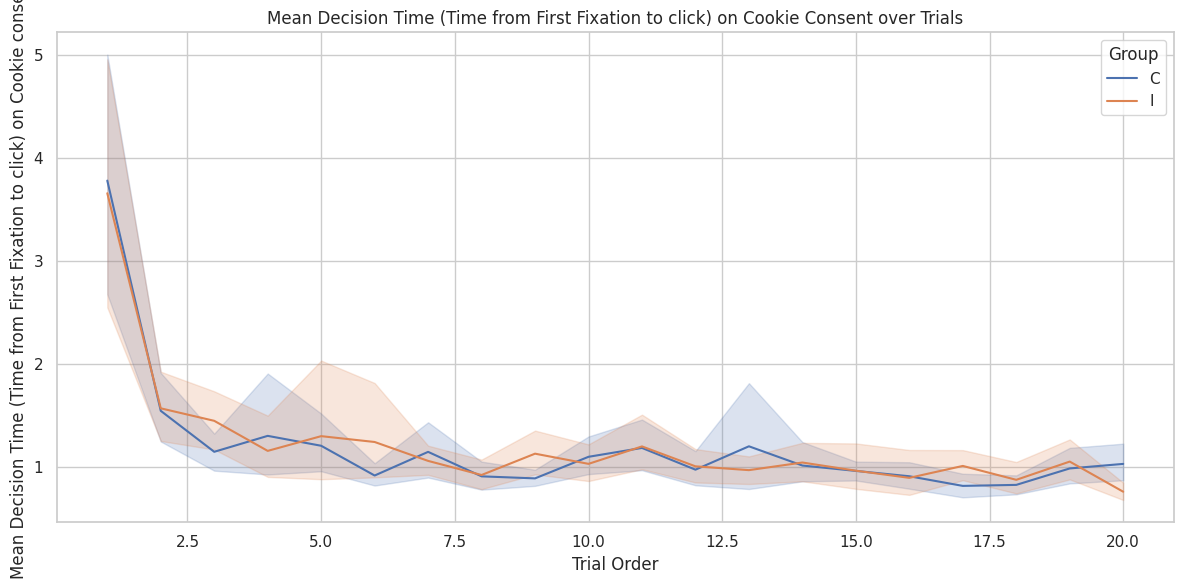

In [ ]:
# Plot: Lineplot of Time from First Fixation to click over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='time_first_fixation_to_click', hue='group', estimator='mean')
plt.title("Mean Decision Time (Time from First Fixation to click) on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Decision Time (Time from First Fixation to click) on Cookie consent")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='time_first_fixation_to_click'>

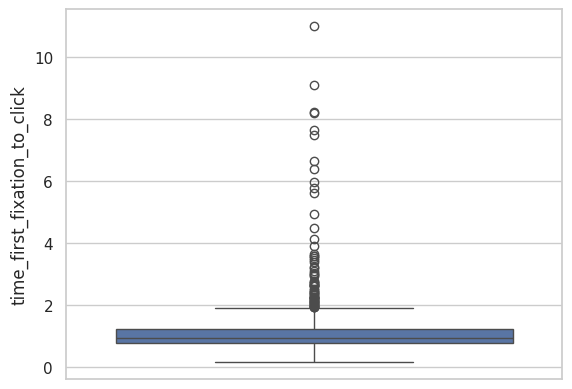

In [ ]:
sns.boxplot(df_filtered["time_first_fixation_to_click"])

<Axes: xlabel='time_first_fixation_to_click', ylabel='Count'>

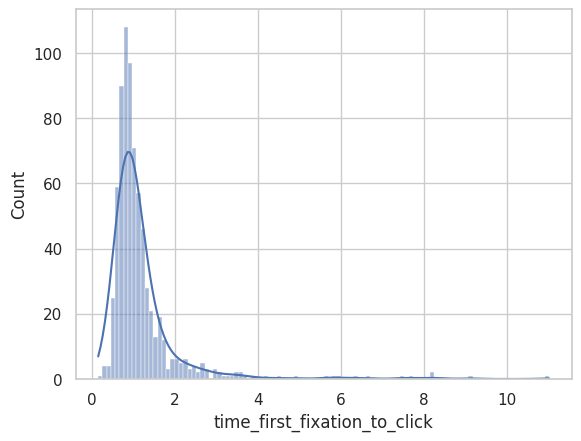

In [ ]:
sns.histplot(df_filtered["time_first_fixation_to_click"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az


# Convert variables to categorical as needed
df_filtered["group_intervention"] = df_filtered["group_intervention"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

# Fit model on early trials
model_DT = bmb.Model(
    "time_first_fixation_to_click ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="weibull"
)
results_DT = model_DT.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)


In [ ]:
az.summary(results_DT)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[100],-0.012,0.197,-0.368,0.363,0.004,0.002,1991.0,2807.0,1.0
1|user_id[101],-0.247,0.137,-0.505,0.015,0.002,0.002,3391.0,4676.0,1.0
1|user_id[102],-0.215,0.144,-0.479,0.058,0.003,0.002,2607.0,4217.0,1.0
1|user_id[103],-0.115,0.143,-0.378,0.167,0.003,0.002,2687.0,4461.0,1.0
1|user_id[104],-0.119,0.136,-0.369,0.134,0.002,0.002,3385.0,4767.0,1.0
1|user_id[105],0.374,0.131,0.140,0.632,0.002,0.001,3217.0,4452.0,1.0
1|user_id[106],0.170,0.135,-0.086,0.420,0.002,0.001,3147.0,4606.0,1.0
1|user_id[107],0.578,0.140,0.320,0.842,0.002,0.001,3349.0,5123.0,1.0
1|user_id[108],-0.107,0.146,-0.382,0.166,0.003,0.002,2724.0,4724.0,1.0
1|user_id[109],-0.337,0.171,-0.659,-0.014,0.004,0.002,2324.0,3599.0,1.0


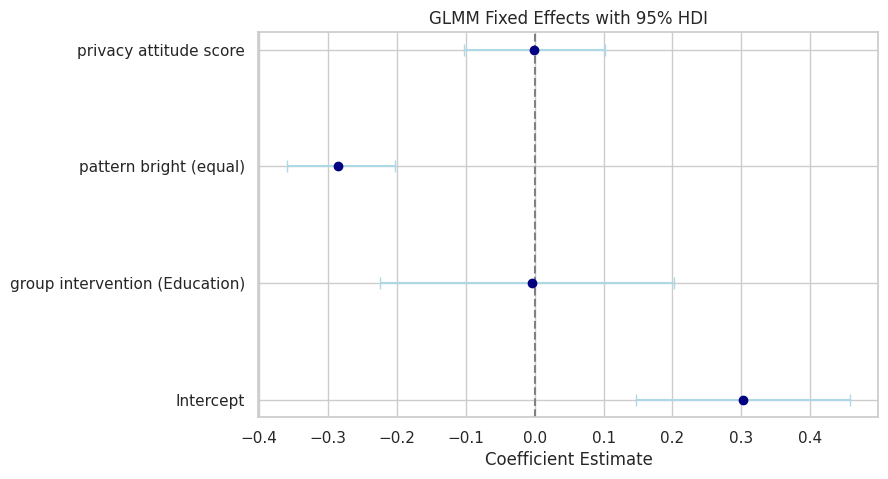

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.302, -0.004, -0.285, -0.001],
    "Lower": [0.147, -0.225, -0.360, -0.102],
    "Upper": [0.458, 0.202, -0.203, 0.102]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

reject fixation time ratio

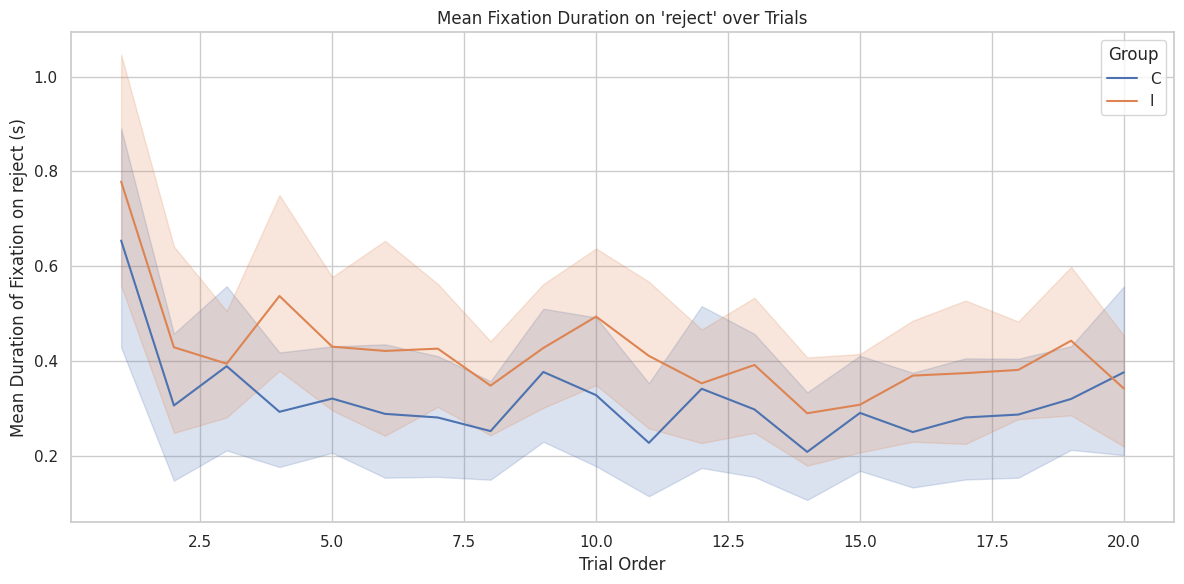

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot: Lineplot of fixation time on reject over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_reject', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on 'reject' over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation on reject (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

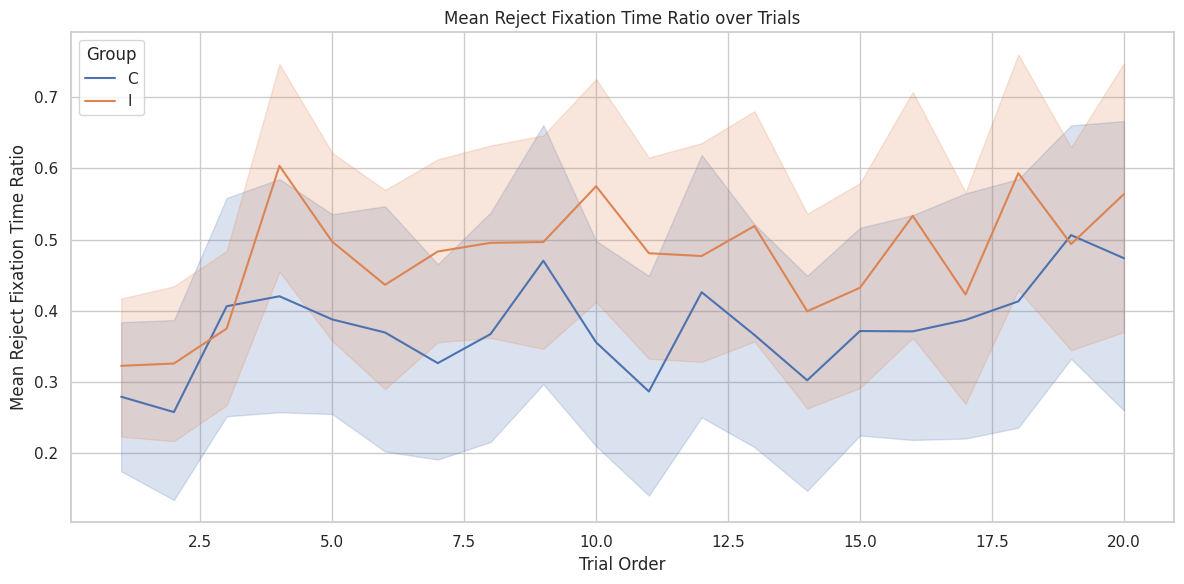

In [ ]:
# Calculate the fixation proportion
df_filtered['reject_ratio'] = df_filtered['duration_fixation_reject'] / df_filtered['duration_fixation_cookie']

# Set seaborn style
sns.set(style="whitegrid")

# Plot: Lineplot of fixation time on reject fixation time ratio over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='trial_order', y='reject_ratio', hue='group', estimator='mean')
plt.title("Mean Reject Fixation Time Ratio over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Reject Fixation Time Ratio")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='reject_ratio'>

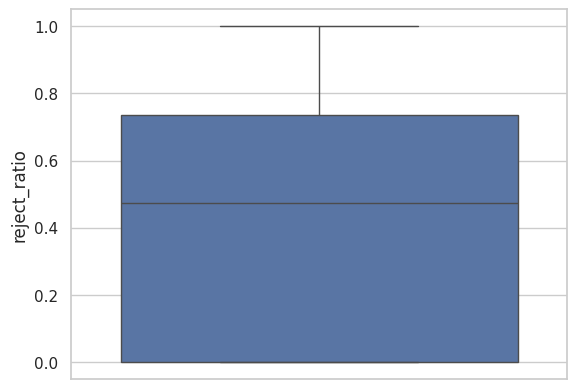

In [ ]:
sns.boxplot(df_filtered["reject_ratio"])

<Axes: xlabel='reject_ratio', ylabel='Count'>

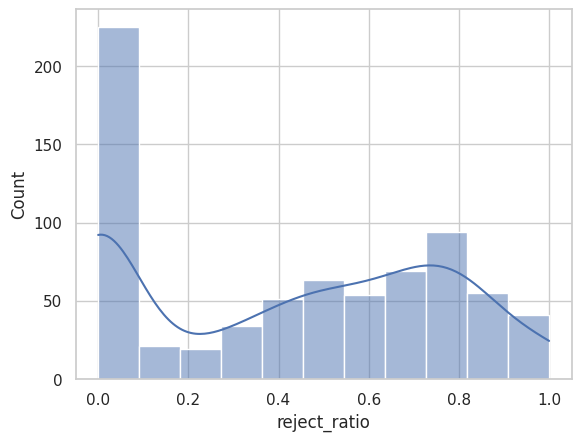

In [ ]:
sns.histplot(df_filtered["reject_ratio"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az
from pandas.api.types import CategoricalDtype

# Calculate the fixation proportion
df_filtered['reject_ratio'] = df_filtered['duration_fixation_reject'] / df_filtered['duration_fixation_cookie']
df_filtered = df_filtered.copy()

# Convert variables to categorical as needed
df_filtered["group_intervention"] = df_filtered["group_intervention"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

model_rftr = bmb.Model(
    "reject_ratio ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="t"
)

# Fit the model with adjusted sampling parameters
results_rftr = model_rftr.fit(
    draws=2000,
    tune=2000,
    chains=4,
    cores=4,
    target_accept=0.99,
)

In [ ]:
import arviz as az
az.summary(results_rftr)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[100],-0.062,0.168,-0.397,0.233,0.004,0.003,1445.0,2228.0,1.00
1|user_id[101],0.365,0.080,0.215,0.517,0.002,0.001,1311.0,2343.0,1.00
1|user_id[102],0.153,0.092,-0.025,0.324,0.003,0.002,1213.0,2069.0,1.00
1|user_id[103],0.132,0.108,-0.070,0.334,0.003,0.002,1622.0,2996.0,1.00
1|user_id[104],0.253,0.090,0.090,0.431,0.002,0.001,1567.0,2693.0,1.00
1|user_id[105],0.121,0.082,-0.033,0.278,0.002,0.001,1326.0,2155.0,1.00
1|user_id[106],0.400,0.083,0.237,0.554,0.002,0.002,1298.0,2065.0,1.00
1|user_id[107],-0.358,0.078,-0.508,-0.215,0.002,0.001,1274.0,2273.0,1.00
1|user_id[108],-0.259,0.097,-0.445,-0.074,0.003,0.002,1372.0,2013.0,1.00
1|user_id[109],-0.195,0.125,-0.425,0.046,0.003,0.002,1396.0,2251.0,1.00


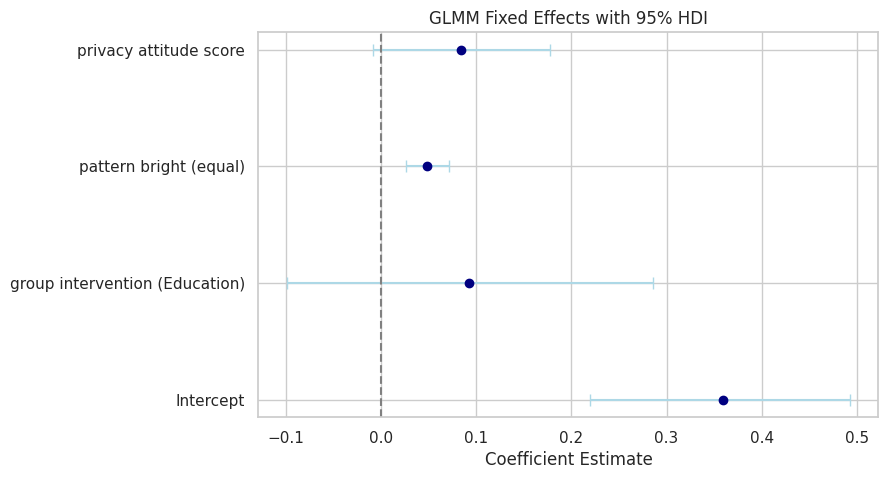

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.359, 0.093, 0.048, 0.084],
    "Lower": [0.220, -0.099, 0.026, -0.008],
    "Upper": [0.493, 0.286, 0.072, 0.178]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

accept fixation time ratio

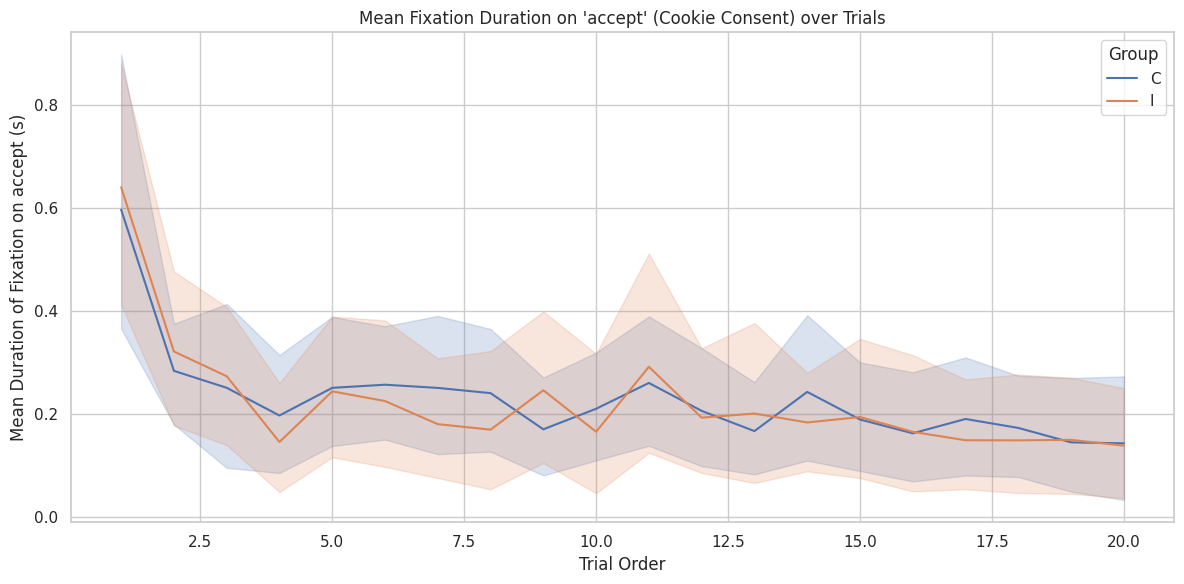

In [ ]:
# Plot: Lineplot of fixation time on accept over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_accept', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on 'accept' (Cookie Consent) over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation on accept (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

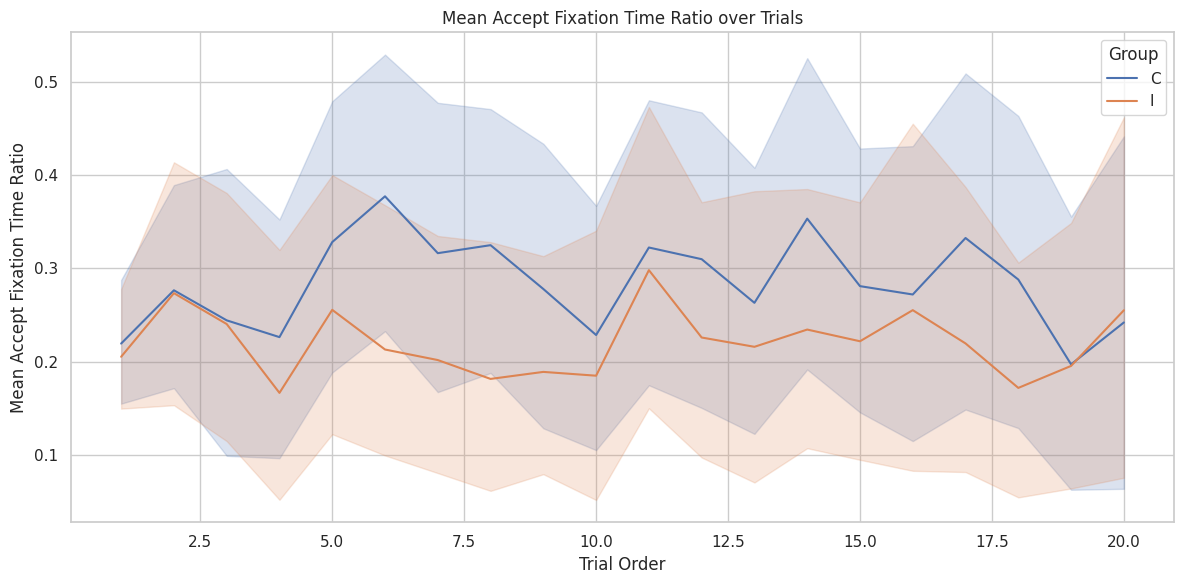

In [ ]:
# Calculate the fixation proportion
df_filtered['accept_ratio'] = df_filtered['duration_fixation_accept'] / df_filtered['duration_fixation_cookie']

# Plot: Lineplot of accept fixation time ratio over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='trial_order', y='accept_ratio', hue='group', estimator='mean')
plt.title("Mean Accept Fixation Time Ratio over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Accept Fixation Time Ratio")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='accept_ratio'>

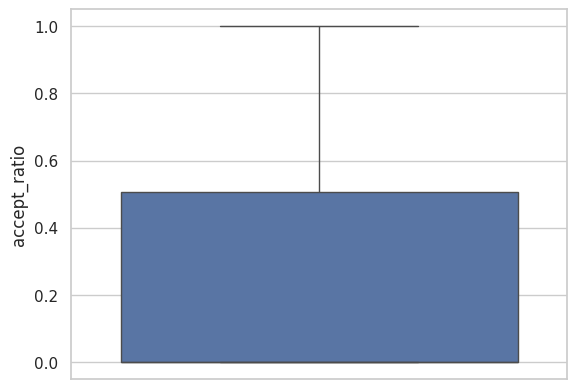

In [ ]:
sns.boxplot(df_filtered["accept_ratio"])

<Axes: xlabel='accept_ratio', ylabel='Count'>

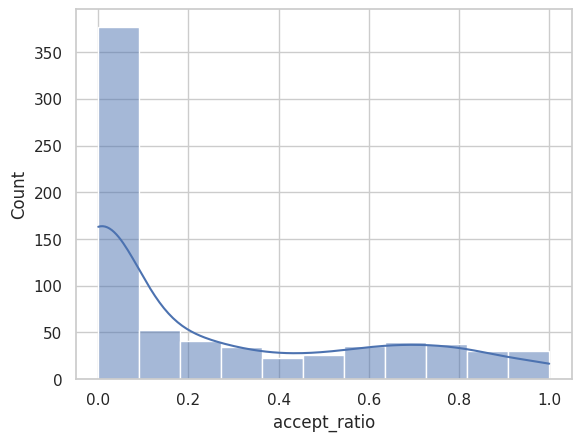

In [ ]:
sns.histplot(df_filtered["accept_ratio"], kde=True)

In [ ]:
import bambi as bmb
import arviz as az

# Calculate the fixation proportion
df_filtered['accept_ratio'] = df_filtered['duration_fixation_accept'] / df_filtered['duration_fixation_cookie']

model_aftr = bmb.Model(
    "accept_ratio ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="t"
)
# Fit the model with adjusted sampling parameters
results_aftr2 = model_aftr2.fit(
    draws=2000,
    tune=2000,
    chains=3,
    cores=3,
    target_accept=0.999,
)

In [ ]:
import arviz as az
az.summary(results_aftr2)

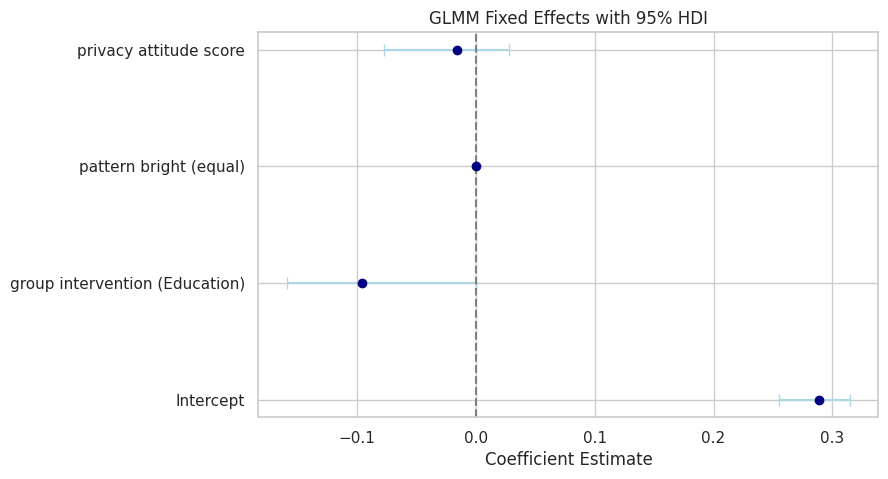

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.289, -0.096, -0.000, -0.016],
    "Lower": [0.255, -0.159, -0.000, -0.077],
    "Upper": [0.315, -0.000, 0.000, 0.028]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

In [ ]:
import bambi as bmb
import arviz as az
# Create 5-level task phase: T1, T2, T3, T4, T5plus (trials 5–20)
def classify_phase5(trial):
    if trial == 1:
        return "T1"
    elif trial == 2:
        return "T2"
    elif trial == 3:
        return "T3"
    elif trial == 4:
        return "T4"
    else:
        return "T5plus"
df_filtered = df_filtered.copy()
df_filtered["task_phase5"] = df_filtered["trial_order"].apply(classify_phase5)

# Calculate the fixation proportion
df_filtered['accept_ratio'] = df_filtered['duration_fixation_accept'] / df_filtered['duration_fixation_cookie']

model_aftr = bmb.Model(
    "accept_ratio ~ group_intervention + pattern_bright + privacy_attitude_score + task_phase5 +(1|user_id)",
    data=df_filtered,
    family="t"
)

# Fit the model with adjusted sampling parameters
results_aftr = model_aftr.fit(
    draws=2000,
    tune=2000,
    chains=4,
    cores=4,
    target_accept=0.99,
)

In [ ]:
import arviz as az
az.summary(results_aftr)

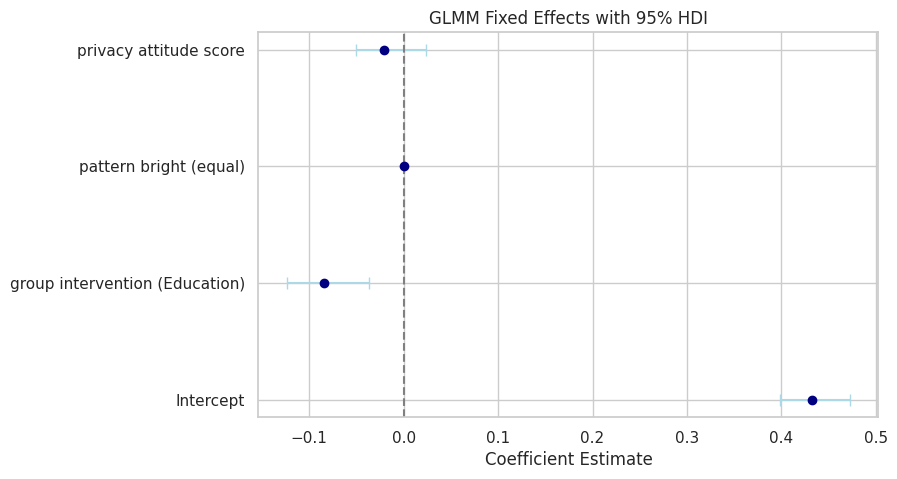

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.432, -0.084, -0.000, -0.021],
    "Lower": [0.399, -0.124, -0.000, -0.050],
    "Upper": [0.473, -0.037, 0.000, 0.024]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

reject to accept fixation time ratio

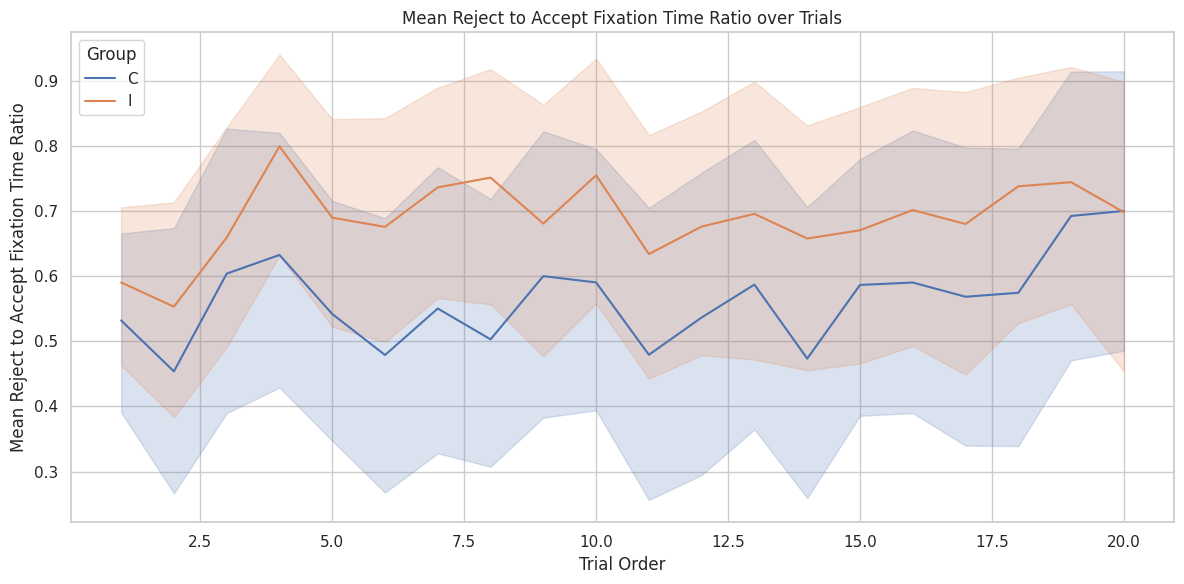

In [ ]:
# Calculate the fixation proportion
df_filtered['reject_accept_ratio'] = df_filtered['duration_fixation_reject'] / (df_filtered['duration_fixation_reject'] + df_filtered['duration_fixation_accept'])

# Plot: Lineplot of reject to accept fixation time ratio over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='trial_order', y='reject_accept_ratio', hue='group', estimator='mean')
plt.title("Mean Reject to Accept Fixation Time Ratio over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Reject to Accept Fixation Time Ratio")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='reject_accept_ratio'>

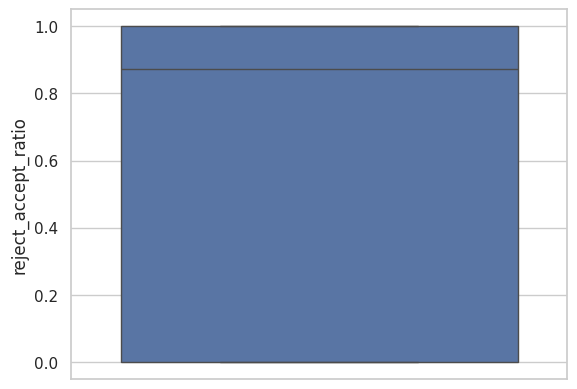

In [ ]:
sns.boxplot(df_filtered["reject_accept_ratio"])

<Axes: xlabel='reject_accept_ratio', ylabel='Count'>

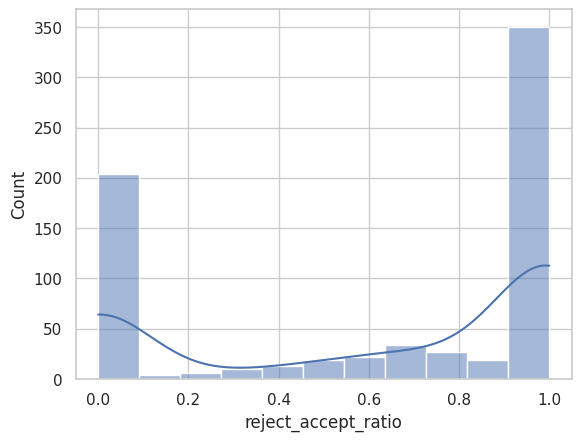

In [ ]:
sns.histplot(df_filtered["reject_accept_ratio"], kde=True)

In [ ]:
import bambi as bmb
import arviz as az

# Calculate the fixation proportion
df_filtered['reject_accept_ratio'] = df_filtered['duration_fixation_reject'] / (df_filtered['duration_fixation_reject'] + df_filtered['duration_fixation_accept'])

# Drop rows where 'reject_accept_ratio' is NaN or infinity
df_model = df_filtered.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['reject_accept_ratio']).copy()

model_raftr = bmb.Model(
    "reject_accept_ratio ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_model,
    family="t"
)

# Fit the model with adjusted sampling parameters
results_raftr = model_raftr.fit(
    draws=2000,
    tune=2000,
    chains=3,
    cores=3,
    target_accept=0.999,
)

In [ ]:
import arviz as az
az.summary(results_raftr)

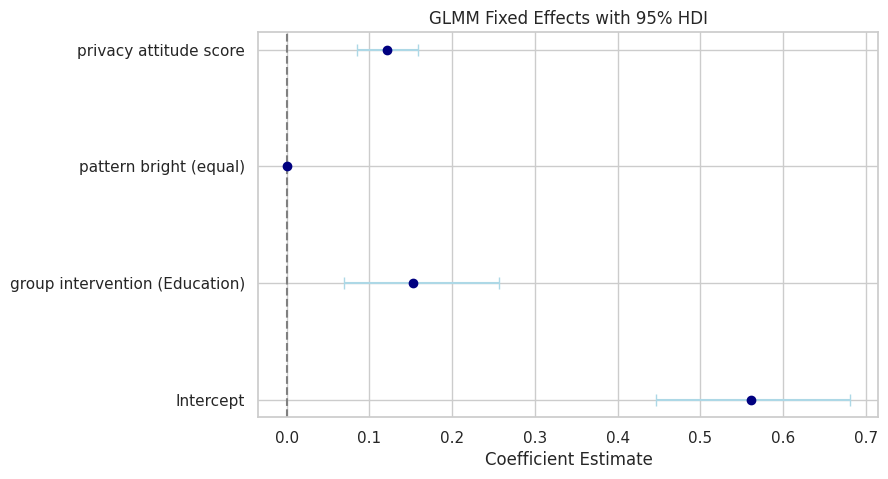

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.561, 0.153, 0.0, 0.121],
    "Lower": [0.446, 0.069, -0.0, 0.085],
    "Upper": [0.681, 0.257, 0.0, 0.159]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

acceptance rate

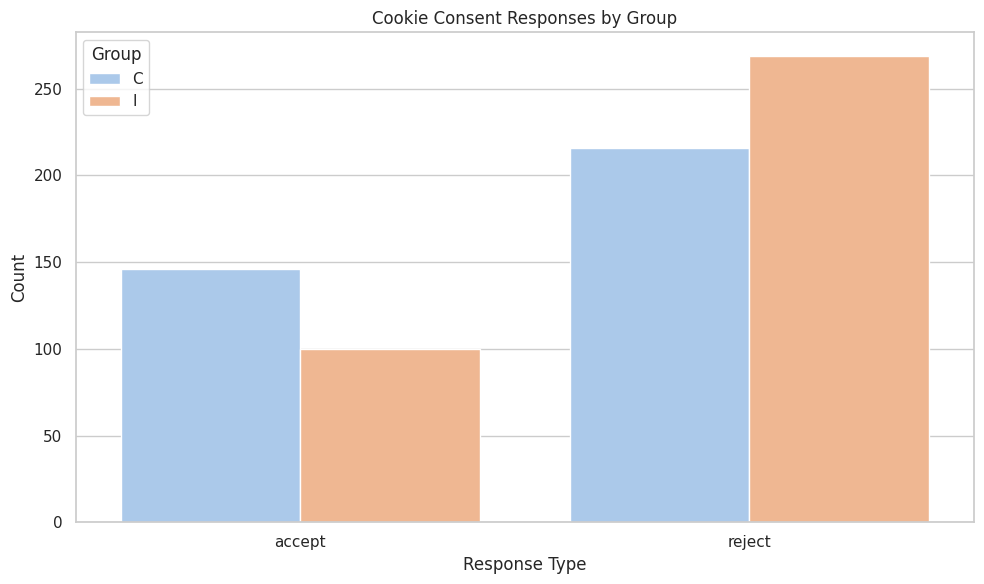

In [ ]:
# Plot: Bar plot of response types by group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='result', hue='group', palette='pastel')
plt.title("Cookie Consent Responses by Group")
plt.xlabel("Response Type")
plt.ylabel("Count")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

df_filtered = df_filtered.copy()

# Convert variables to categorical as needed
df_filtered["group_intervention"] = df_filtered["group_intervention"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

# Fit logistic mixed-effects model on early trials
model_AR = bmb.Model(
    "accepted ~ group_intervention + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="bernoulli"
)
results_AR = model_AR.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)


In [ ]:
az.summary(results_AR)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[100],0.363,2.640,-4.473,5.575,0.060,0.034,1923.0,3282.0,1.0
1|user_id[101],-7.256,4.459,-16.000,-0.466,0.068,0.064,5017.0,4674.0,1.0
1|user_id[102],-6.820,4.453,-15.152,0.388,0.070,0.062,4572.0,4698.0,1.0
1|user_id[103],-0.499,1.548,-3.498,2.282,0.032,0.019,2368.0,4135.0,1.0
1|user_id[104],-2.350,1.685,-5.542,0.660,0.034,0.022,2505.0,4415.0,1.0
1|user_id[105],-7.354,4.383,-15.733,-0.607,0.074,0.073,4294.0,3684.0,1.0
1|user_id[106],-7.502,4.407,-15.762,-0.567,0.079,0.072,3255.0,3960.0,1.0
1|user_id[107],8.965,4.065,2.698,16.746,0.064,0.070,4644.0,4314.0,1.0
1|user_id[108],8.580,4.185,1.990,16.917,0.071,0.061,3712.0,4221.0,1.0
1|user_id[109],8.207,4.421,0.796,16.677,0.072,0.062,3974.0,4752.0,1.0


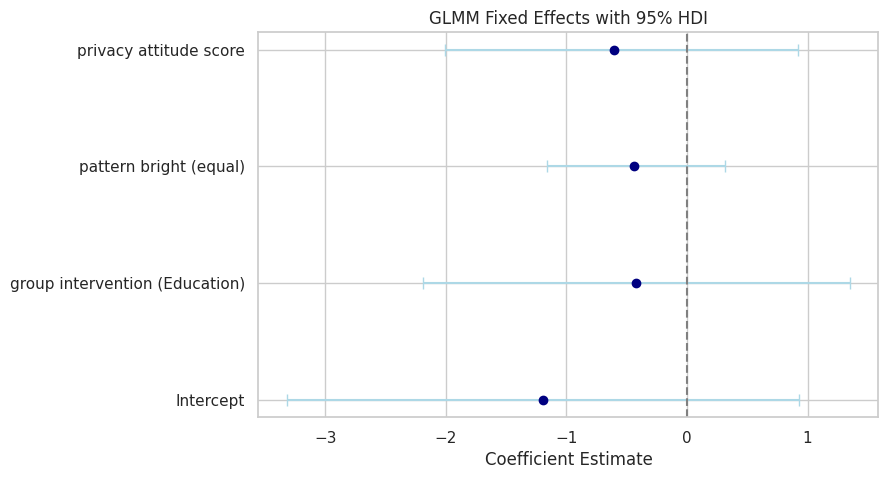

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group intervention (Education)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [-1.191, -0.425, -0.441, -0.606],
    "Lower": [-3.321, -2.187, -1.160, -2.005],
    "Upper": [0.928, 1.354, 0.312, 0.924]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()